# Plotting Mean Speed Over Time for a Movie

## The Mean Over All Objects at One Time Point

In this notebook, we will demonstrate how to measure and plot the mean cell speed over time using TrackMate data. The image used in this example is from a cell migration movie acquired in the lab of Guillaume JACQUEMET at the University of Turku, Finland. This dataset is part of the demo provided in the recent TrackMate paper ([Nature article](https://www.nature.com/articles/s41592-022-01507-1)).

![The image the data comes from](images/TrackMate-image_01.png)

TrackMate provides averages of quantities over a track. For instance, you can obtain the mean speed for one cell averaged over all time points that the cell is imaged. However, if you want to compute the mean speed over all cells at each time point and plot this mean over time, you need to do this outside of TrackMate, e.g. using Python with data exported from TrackMate.

## Exporting the Data to CSV

To plot the speed averaged across all cells, you need the instantaneous speed data. Instantaneous speed is defined between two spots and belongs to links or edges in TrackMate. Therefore, you need to export the `edges` table from TrackMate:

![Where to export the data from in TrackMate](images/TrackMate-image_02.png)

Save the CSV file, and you can then use the script below to analyze it. In this course, we will use the CSV file stored in `data/TrackMate-edgeTable.csv`.

## What We Will Do and Learn

In this tutorial, we will explore some advanced features of Pandas, similar to the pivot table functionality found in Excel.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

path = 'data/TrackMate-edgeTable.csv'

# Load the table.
df = pd.read_csv(path)

# Display its head.
df.head()


,LABEL,TRACK_ID,SPOT_SOURCE_ID,SPOT_TARGET_ID,LINK_COST,DIRECTIONAL_CHANGE_RATE,SPEED,DISPLACEMENT,EDGE_TIME,EDGE_X_LOCATION,EDGE_Y_LOCATION,EDGE_Z_LOCATION,MANUAL_EDGE_COLOR
0,Label,Track ID,Source spot ID,Target spot ID,Edge cost,Directional change rate,Speed,Displacement,Edge time,Edge X,Edge Y,Edge Z,Manual edge color
1,Label,Track ID,Source ID,Target ID,Cost,γ rate,Speed,Disp.,Edge T,Edge X,Edge Y,Edge Z,Edge color
2,NaN,NaN,NaN,NaN,(cost),(rad/min),(pixel/min),(pixel),(min),(pixel),(pixel),(pixel),NaN
3,ID21672 → ID22000,0,21672,22000,7.2609458070697315,1.458552901814804,2.694614222308962,2.694614222308962,75.5,912.1487997514741,283.8715345926959,0.0,NaN
4,ID11941 → ID12177,0,11941,12177,10.216988304241653,0.3960839492293604,3.1964024002371247,3.1964024002371247,39.5,914.365025800919,323.1844488782534,0.0,NaN


We need to perform some data cleaning.

We notice that the CSV file contains four lines of headers:
1. One line for the feature key (e.g., `SPEED`),
2. One line for the feature name (`Speed`),
3. One line for the short name (which is the same as the name), and
4. One line for the units (e.g., `pixel/min`).

The first row of the CSV file has been used as column labels, but the 2nd to 4th rows have been included as strings in the table data. As a result, all the columns are treated as strings. We need to fix this issue.

First, let's remove the first three rows, which correspond to the names and units.


In [2]:
# Remove the first 3 lines (names and units). This is basically removing from an already existing DF
#df = df.drop( [0,1,2])

In [3]:
# however we can do the same in import
# Load the table.
df = pd.read_csv(path, skiprows=[1,2,3])

# Display its head.
df.head()

,LABEL,TRACK_ID,SPOT_SOURCE_ID,SPOT_TARGET_ID,LINK_COST,DIRECTIONAL_CHANGE_RATE,SPEED,DISPLACEMENT,EDGE_TIME,EDGE_X_LOCATION,EDGE_Y_LOCATION,EDGE_Z_LOCATION,MANUAL_EDGE_COLOR
0,ID21672 → ID22000,0,21672,22000,7.260946,1.458553,2.694614,2.694614,75.5,912.148800,283.871535,0.0,NaN
1,ID11941 → ID12177,0,11941,12177,10.216988,0.396084,3.196402,3.196402,39.5,914.365026,323.184449,0.0,NaN
2,ID19800 → ID20051,0,19800,20051,5.033443,0.454160,2.243534,2.243534,68.5,945.527254,285.977912,0.0,NaN
3,ID21668 → ID21886,0,21668,21886,1.663966,2.959189,1.289948,1.289948,75.5,932.999422,227.896925,0.0,NaN
4,ID3440 → ID3677,0,3440,3677,16.510380,1.063614,4.063297,4.063297,6.5,922.265233,339.995371,0.0,NaN


In [4]:
# check that the data was read as numerical values, or strings
df.dtypes

LABEL                       object
TRACK_ID                     int64
SPOT_SOURCE_ID               int64
SPOT_TARGET_ID               int64
LINK_COST                  float64
DIRECTIONAL_CHANGE_RATE    float64
SPEED                      float64
DISPLACEMENT               float64
EDGE_TIME                  float64
EDGE_X_LOCATION            float64
EDGE_Y_LOCATION            float64
EDGE_Z_LOCATION            float64
MANUAL_EDGE_COLOR          float64
dtype: object

Then let's remove the `LABEL` column, that has string content.

In [5]:
# Remove the label column, it is not numeric.
df = df.drop(labels='LABEL', axis=1)
df.head()

,TRACK_ID,SPOT_SOURCE_ID,SPOT_TARGET_ID,LINK_COST,DIRECTIONAL_CHANGE_RATE,SPEED,DISPLACEMENT,EDGE_TIME,EDGE_X_LOCATION,EDGE_Y_LOCATION,EDGE_Z_LOCATION,MANUAL_EDGE_COLOR
0,0,21672,22000,7.260946,1.458553,2.694614,2.694614,75.5,912.148800,283.871535,0.0,NaN
1,0,11941,12177,10.216988,0.396084,3.196402,3.196402,39.5,914.365026,323.184449,0.0,NaN
2,0,19800,20051,5.033443,0.454160,2.243534,2.243534,68.5,945.527254,285.977912,0.0,NaN
3,0,21668,21886,1.663966,2.959189,1.289948,1.289948,75.5,932.999422,227.896925,0.0,NaN
4,0,3440,3677,16.510380,1.063614,4.063297,4.063297,6.5,922.265233,339.995371,0.0,NaN


Finally, let's convert all the table data to numeric.

In [6]:
# if you are having problems with numbers that upon import are read as text, then you can use
# df = df.apply(pd.to_numeric)

Et voilà !
Now we can analyze the data in our table. 

So we want to compute the mean of the `SPEED` values, but averaged over all the cells in a given time-point.
The time-point is indexed in the table by the feature `EDGE_TIME`. 
So we want to group all values based on `EDGE_TIME`, and take the mean over all the `SPEED` values for rows that have a common `EDGE_TIME` value.

In Pandas this is done using the `groupby` method:

In [22]:
# Make a new table where we group everything by 'EDGE_TIME',
# and within a group, compute the mean of 'SPEED'
speed = df.groupby('EDGE_TIME')[['SPEED']].mean()
speed['STD'] = df.groupby('EDGE_TIME')[['SPEED']].std()
# The new table uses 'EDGE_TIME' as an index (or 'x axis'), very convenient.

print(speed.head())

              SPEED       STD
EDGE_TIME                    
0.5        2.416612  1.499803
1.5        2.423123  1.729258
2.5        2.323619  1.538024
3.0        2.593361       NaN
3.5        2.326947  1.554234


We now have what we need: a table made of a single column `SPEED` with `EDGE_TIME` as index. 
We can now plot it.

<Axes: xlabel='EDGE_TIME'>

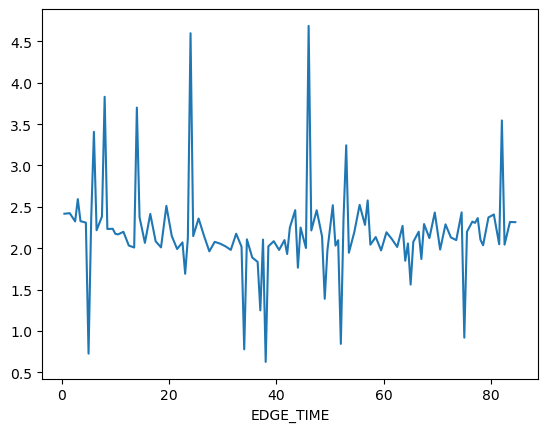

In [11]:

# Plot it. (I read the units from the image. Pixels are not calibrated but 
# we know the frame interval.)

speed['SPEED'].plot(x='time (min)', y='cell speed (pixel/min')

In [12]:
import seaborn as sns

Text(0, 0.5, 'Cell Speed (pixel/min)')

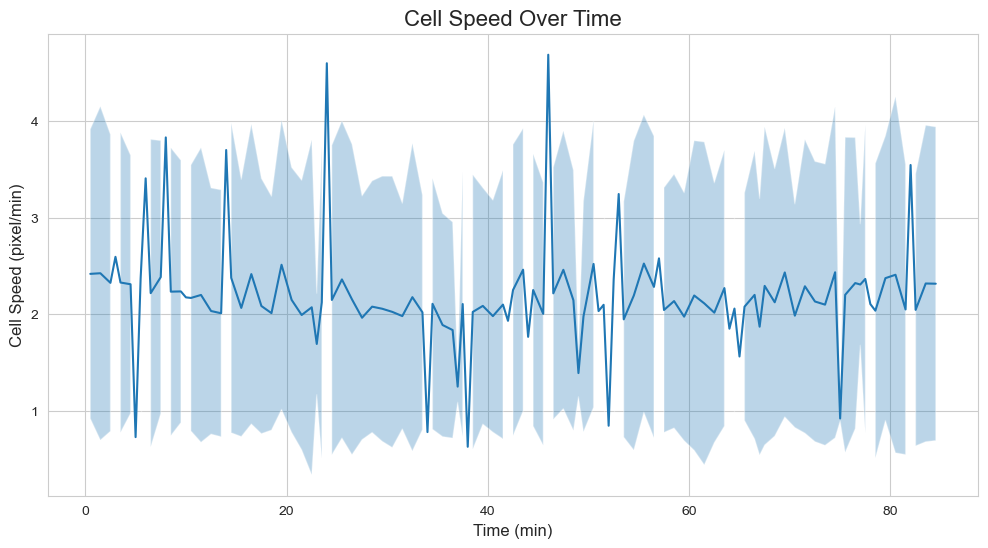

In [24]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")

# Plot the filtered speed
plt.plot(speed.index, speed['SPEED'], label='Filtered Speed')

# Add the shaded area for standard deviation
plt.fill_between(speed.index, 
                 speed['SPEED'] - speed['STD'],
                 speed['SPEED'] + speed['STD'],
                 alpha=0.3)

# Customize the plot
plt.title("Cell Speed Over Time", fontsize=16)
plt.xlabel("Time (min)", fontsize=12)
plt.ylabel("Cell Speed (pixel/min)", fontsize=12)

We see that there are some bumps in the speed. 
Because we average over so many cells, it is improbably that it is coming from a synchronized cell movement. 
Most likely, it is caused by door slamming. 
We can fiter them out using a rolling median. We need a window of 5 time-points to filter the bumps out.

Pandas, which is a wonderful library, has a function to apply a rolling median, cleverly called `rolling`.
With the following command, we add a new column (`FILTERED_SPEED`) with the filtered speed value.

<Axes: xlabel='EDGE_TIME'>

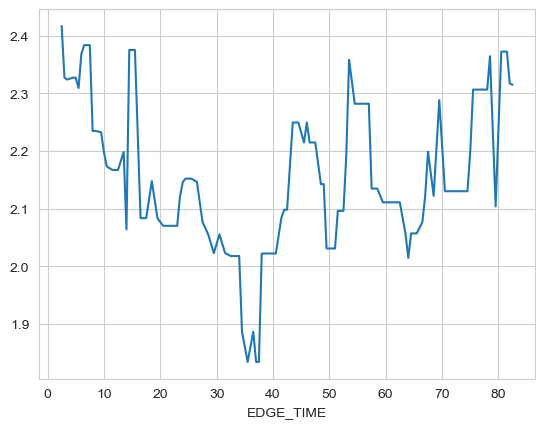

In [25]:
speed['FILTERED_SPEED'] = speed['SPEED'].rolling(5, center=True).median()
# Calculate rolling standard deviation
speed['ROLLING_STD'] = speed['SPEED'].rolling(5, center=True).std()

# Then we plot it.
speed['FILTERED_SPEED'].plot(x='time (min)', y='cell speed (pixel/min')

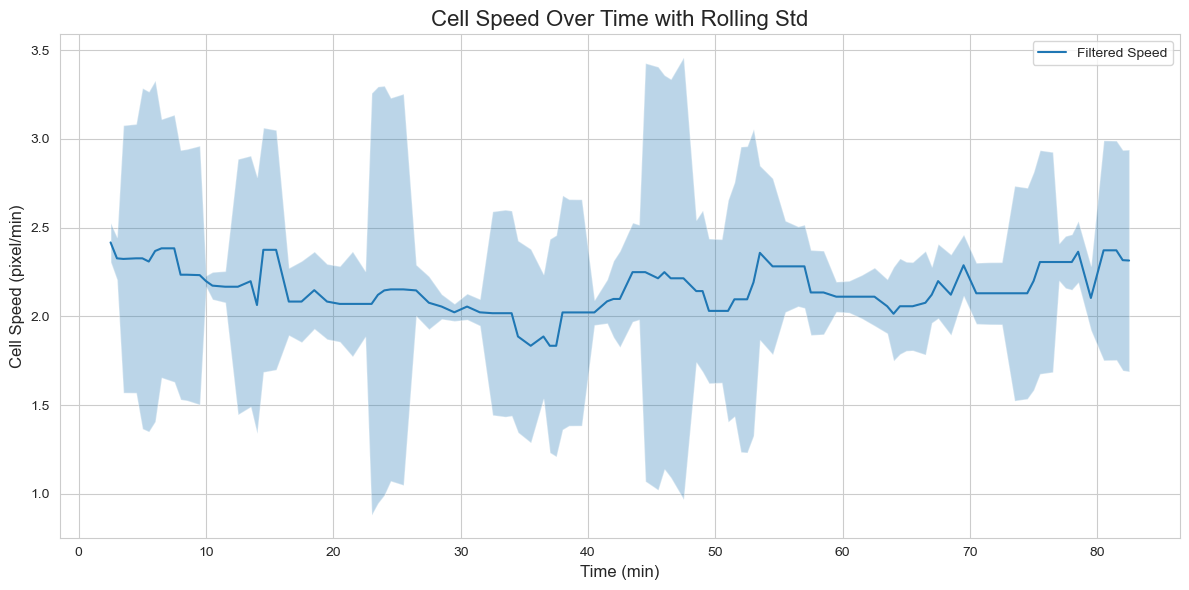

In [17]:
plt.figure(figsize=(12, 6))

# Plot the filtered speed
plt.plot(speed.index, speed['FILTERED_SPEED'], label='Filtered Speed')

# Add the shaded area for standard deviation
plt.fill_between(speed.index, 
                 speed['FILTERED_SPEED'] - speed['ROLLING_STD'],
                 speed['FILTERED_SPEED'] + speed['ROLLING_STD'],
                 alpha=0.3)

plt.title("Cell Speed Over Time with Rolling Std", fontsize=16)
plt.xlabel("Time (min)", fontsize=12)
plt.ylabel("Cell Speed (pixel/min)", fontsize=12)
plt.legend()
plt.tight_layout()

Ok now we see clearer. 
It seems that the speed has a trend: early in the movie that cells start moviing quicky, but there is a small decrease in speed before it reaches a plateau. 
Let's quantify that.

In [18]:

# Early movie speed.
early = speed.index < 10 # first 10 minutes

# early speed:
es = speed[early]['FILTERED_SPEED']
print('First 10 minutes: speed = %.2f ± %.2f pixels/min' % (es.mean(), es.std()))

# Later in the movie 
late = (speed.index > 20) & (speed.index < 30)

# late speed:
ls = speed[late]['FILTERED_SPEED']
print('Late, between 20 and 30 minutes: speed = %.2f ± %.2f pixels/min' % (ls.mean(), ls.std()))

First 10 minutes: speed = 2.32 ± 0.06 pixels/min
Late, between 20 and 30 minutes: speed = 2.10 ± 0.04 pixels/min


So there is indeed a difference in speed early and late in the movie when it comes to cell speed.
This difference is small, but we could detect it reliably. 

The next questions are:
1. Is it significant? This is left to the reader as an exercise.
2. What causes this decrease, if significant? It could be phototoxicity. 
Strong illumination in fluorescence microscopy has been shown to slow down cell.
But it could also be a biological effect linked to migration or having more space. 
Making sense of this observation takes much more efforts on the biology side.
But these scripts cover the analysis in a convenient and fast way.